In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("bidadata.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# finding the number of missing values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# filling in the null values with the mode of each column
for column in data.columns:
    data[column].fillna(data[column].mode().iloc[0], inplace=True)

In [6]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# dropping the Loan_ID column
data = data.drop(['Loan_ID'], axis=1)

In [9]:
# selecting the features to be used in the deep learning model
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [10]:
# converting categorical data to numerical data for use in the model
# using LabelEncoder
encoders = {}
for column in ['Gender', 'Married', 'Dependents',
                'Education', 'Self_Employed', 'Property_Area']:
    categorical_convert = LabelEncoder()
    X[column] = categorical_convert.fit_transform(X[column])
    encoders[column] = categorical_convert

In [11]:
categorical_convert = LabelEncoder()
y = categorical_convert.fit_transform(y)

In [12]:
# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# using StandardScaler to normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# initializing the classifier
classifier = Sequential()

In [15]:
# adding layers to the neural network (input layer, one hidden layer, and an output layer)
classifier.add(Dense(11, kernel_initializer = "uniform", activation = "relu", input_dim=11))
classifier.add(Dense(6, kernel_initializer = "uniform", activation = "relu"))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

In [16]:
# applying a gradient descent to optimize the network
classifier.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [17]:
# fitting the classifier to the data
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150)

Epoch 1/150
50/50 [==============================] - 5s 5ms/step - loss: 0.6889 - accuracy: 0.6680
Epoch 2/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.6721
Epoch 3/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.6721
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7862
Epoch 5/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7923
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7862
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7963
Epoch 8/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7902
Epoch 9/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.8004
Epoch 10/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7882
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8187
Epoch 84/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8126
Epoch 85/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8045
Epoch 86/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4330 - accuracy: 0.8065
Epoch 87/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8208
Epoch 88/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8147
Epoch 89/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8187
Epoch 90/150
50/50 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8228
Epoch 91/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8126
Epoch 92/150
50/50 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8248
Epoch 93/150


In [18]:
# getting the loss and accuracy of the network
classifier.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7724


[0.5432183146476746, 0.772357702255249]

In [19]:
y_pred = classifier.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [20]:
y_pred = (y_pred > 0.5).astype(int)

In [21]:
y_pred

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [22]:
# printing out a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 15],
       [13, 79]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

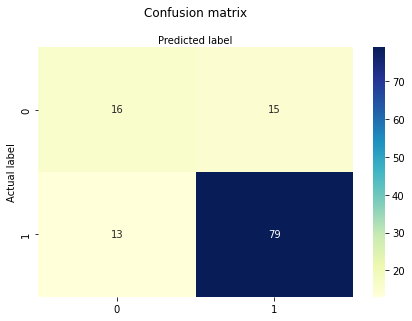

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
# calculating the accuracy of the predictions
(95/123) * 100

77.23577235772358

In [25]:
new_pred = classifier.predict(scaler.transform(np.array([[1, 0, 0, 1, 0, 1300, 0, 350, 360, 0.0, 0]])))

1/1 [==============================] - 0s 20ms/step


C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
new_pred = (new_pred > 0.5).astype(int)
new_pred

array([[0]])

In [27]:
def make_classifier():
    classifier = Sequential()
    classifier.add(Dense(11, kernel_initializer = "uniform", activation = "relu", input_dim=11))
    classifier.add(Dense(6, kernel_initializer = "uniform", activation = "relu"))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [28]:
classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=150)

C:\Users\BRANDO~1\AppData\Local\Temp/ipykernel_27176/1323621957.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = make_classifier, batch_size=10, nb_epoch=150)


In [29]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [30]:
mean = accuracies.mean()
mean

0.6722857236862183

In [31]:
variance = accuracies.var()
variance

0.007119648804112302